(visualizzare_data_frame_notebook)=
# Visualizzazione dei dati

La libreria matplotlib è molto potente ma di non facile utilizzo. Per la visualizzazione dei dati è più semplice utlizzare Seaborn. I tutorial sulla pagina web di [Seaborn](https://seaborn.pydata.org/) sono molto ben fatti e ne consiglio la lettura. Esaminiamo qui alcuni esempi.

In [54]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
# Apply the default theme.
sns.set_theme()
# Select a better color palette.
sns.set_palette("colorblind")

Considererò nuovamente i dati Palmer penguin.

In [55]:
df = pd.read_csv("data/penguins.csv")

## Barplot

Una delle visualizzazioni più semplici è il barplot. Potremmo chiederci, per esempio, quante osservazioni ci sono per ciascuna isola. È possibile rispondere a questa domanda con una distribuzione di frequenza

In [32]:
df['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

oppure, usando direttamente pandas, possiamo visualizzare tale distribuzione di frequenza con un barplot:

<AxesSubplot: >

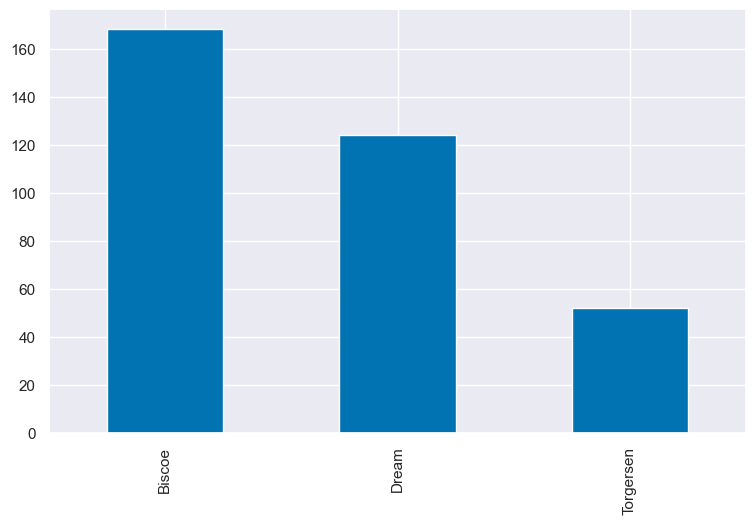

In [56]:
plt.figure(figsize=(9, 5.5))
df['island'].value_counts().plot(kind='bar')

Possiamo cambiare l'orientamento del barplot:

<AxesSubplot: >

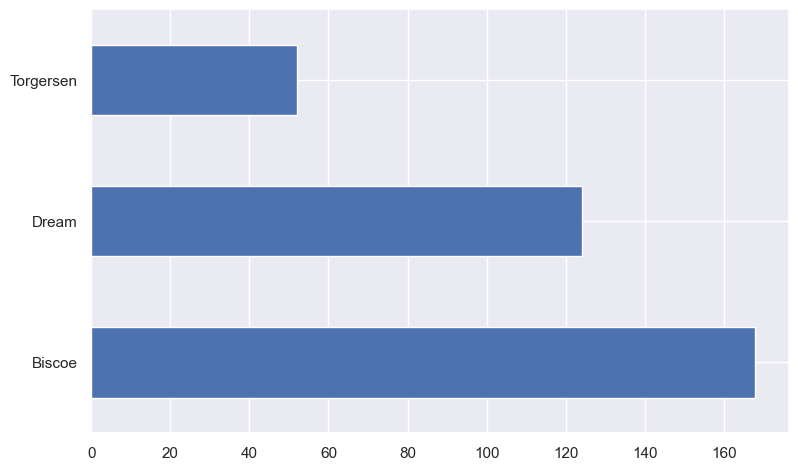

In [40]:
plt.figure(figsize=(9, 5.5))
df['island'].value_counts().plot(kind='barh')

## Visualizzare la distribuzione dei dati

Una delle rappresentazioni grafiche dei dati che si usano più spesso è l'istogramma, o l'istogramma lisciato. Come in precedenza, possiamo creare un istogramma o un kde plot direttamente da pandas:

<AxesSubplot: ylabel='Frequency'>

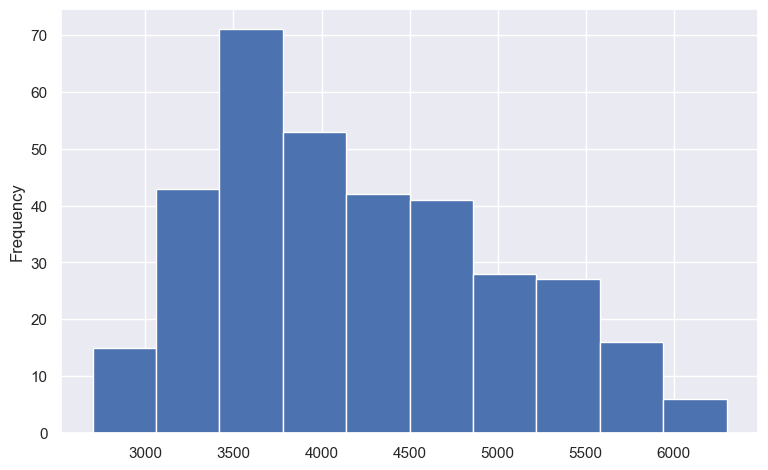

In [41]:
plt.figure(figsize=(9, 5.5))
df["body_mass_g"].plot.hist()

<AxesSubplot: ylabel='Density'>

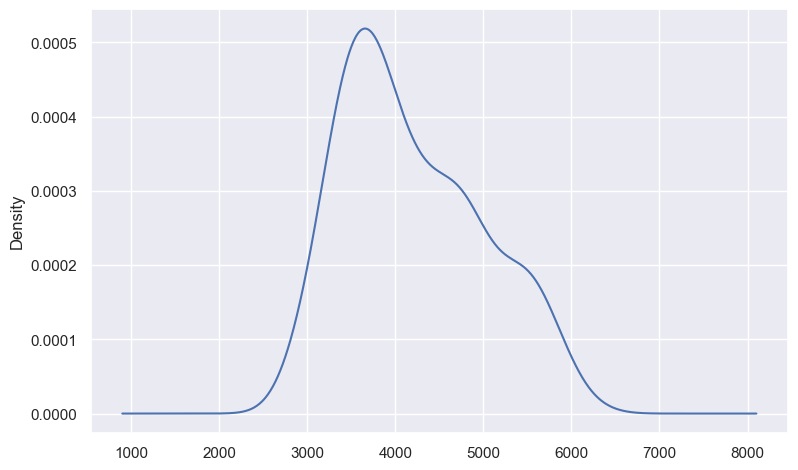

In [42]:
plt.figure(figsize=(9, 5.5))
df["body_mass_g"].plot.kde(bw_method=0.3)

Oppure possiamo usare Seaborn:

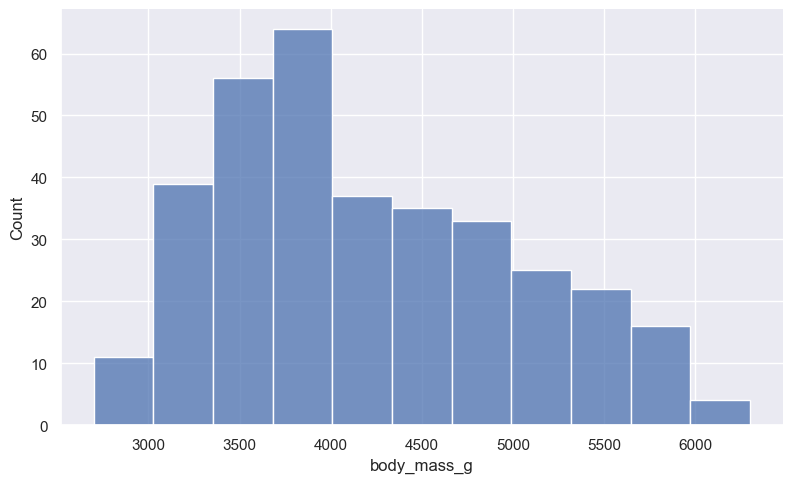

In [43]:
sns.displot(df, x="body_mass_g", aspect=1.618)

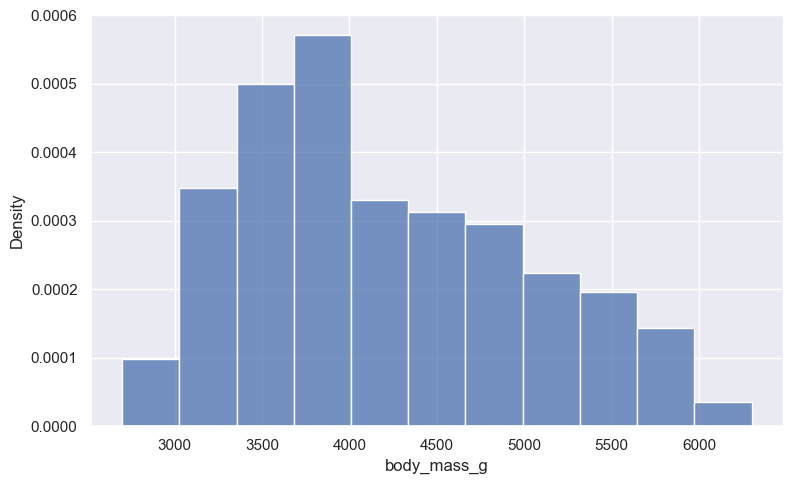

In [44]:
sns.displot(df, x="body_mass_g", stat="density", aspect=1.618)

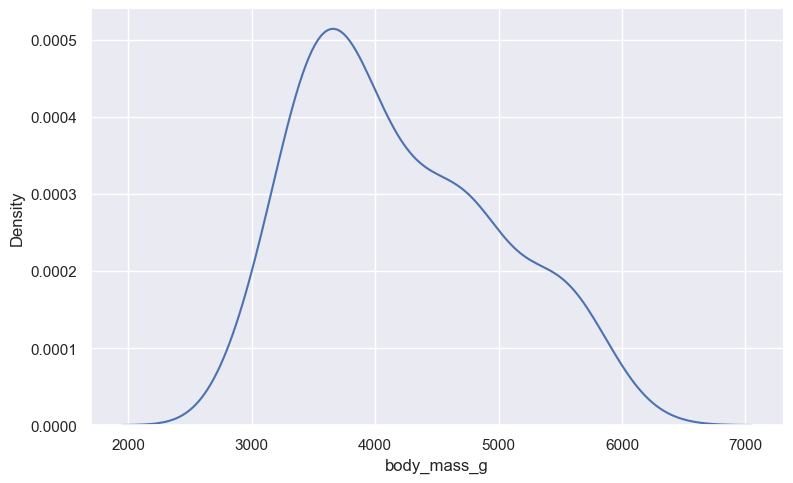

In [45]:
sns.displot(df, x="body_mass_g", kind="kde", aspect=1.618)

Creaiamo l'istogramma lisciato di `body_massg` in funzione di `species`:

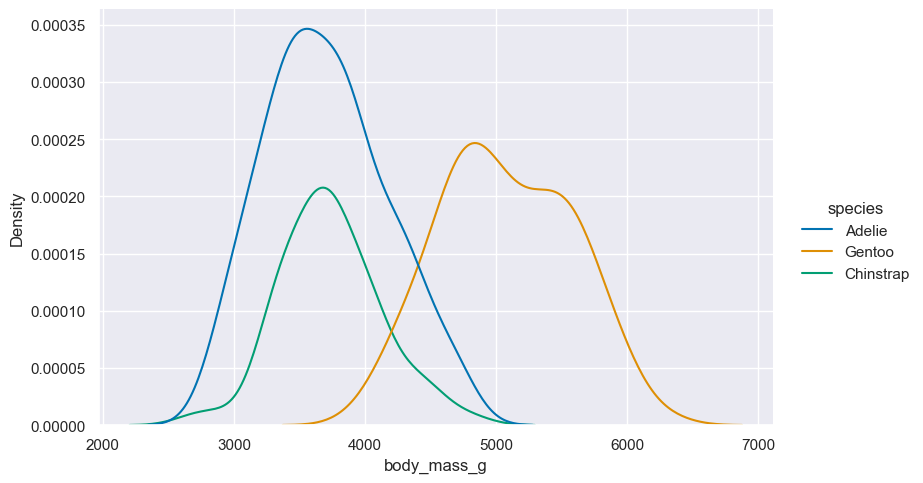

In [57]:
sns.displot(df, x="body_mass_g", hue="species", kind="kde", aspect=1.618)

## Visualizzazione di dati categoriali

Consideriamo ora il caso in cui si vuole rappresentare la relazione tra una variabile numerica e una variabile categoriale. 

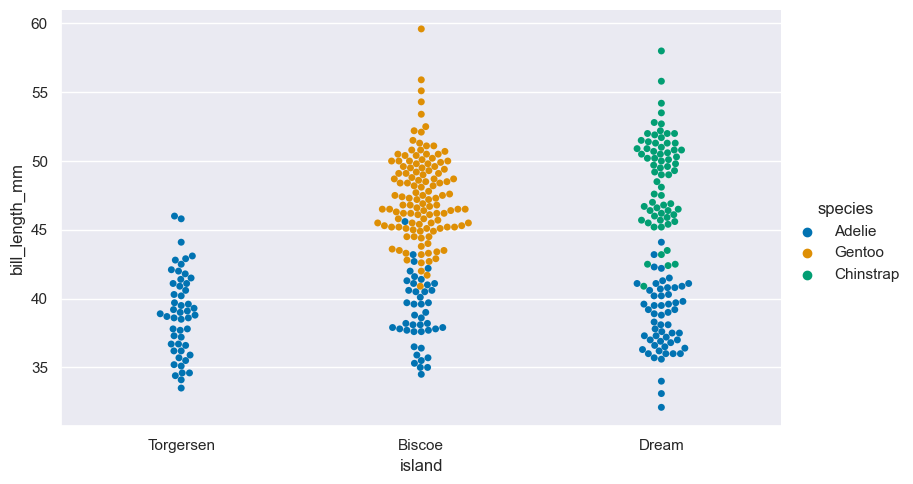

In [58]:
ax = sns.catplot(data=df, x="island", y="bill_length_mm", hue="species", 
                 kind="swarm", aspect=1.618)

Scopriamo che

- Adelie vive in tutte e tre le isole.
- Gentoo vive solo in Biscoe.
- Gentoo e Chinstrap hanno becchi più lunghi rispetto ad Adelie.

Analizziamo ora la massa del corpo in funzione della specie, distinguendo le osservazioni in base al genere. Creaiamo il grafico con dei boxplot.

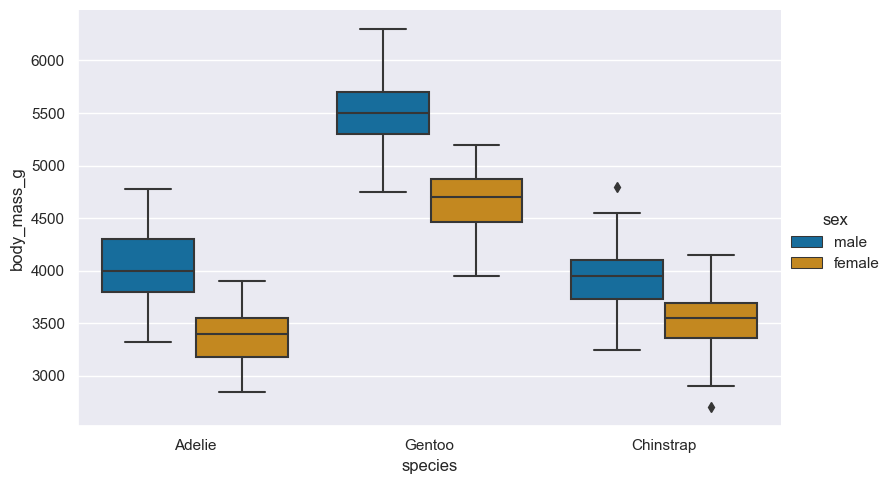

In [59]:
sns.catplot(df, x='species', y='body_mass_g', hue='sex', kind="box", aspect=1.618)

Dal diagramma è evidente che i pinguini maschi pesano più delle femmine in tutte le specie e che i pinguini Gentoo pesano più di quelli Adelie e Chinstrap. 

In alternativa, possiamo usare la rappresentazione del violinplot.

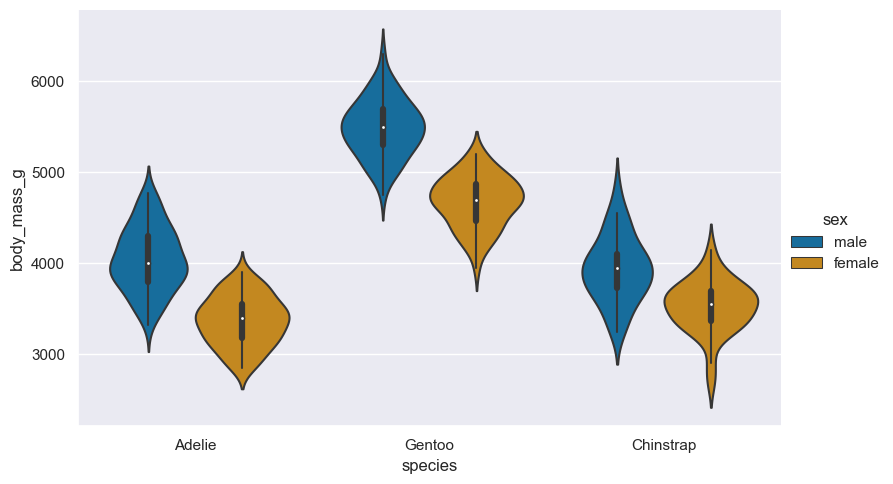

In [60]:
sns.catplot(df, x='species', y='body_mass_g', hue='sex', kind="violin", aspect=1.618)

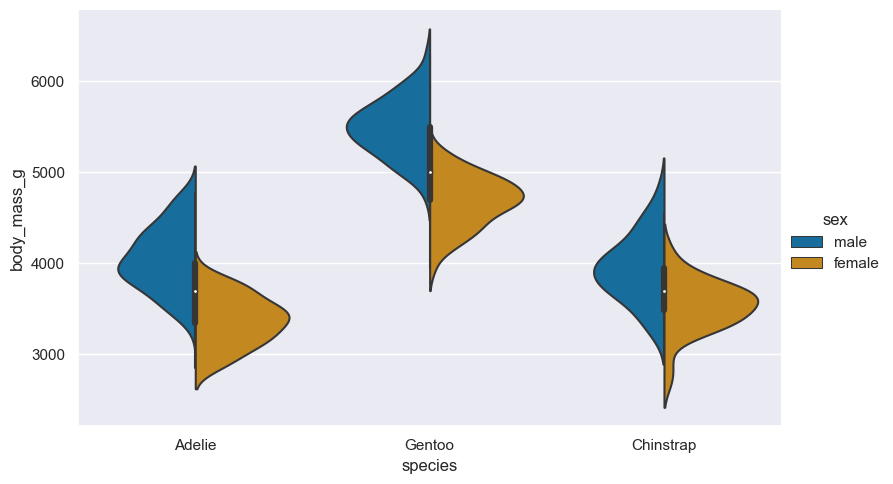

In [61]:
sns.catplot(df, x='species', y='body_mass_g', hue='sex', kind="violin", 
            split=True, aspect=1.618)

Possiamo facilmente creare un grafico a pannelli per mostrare ulteriori dimensioni dei dati:

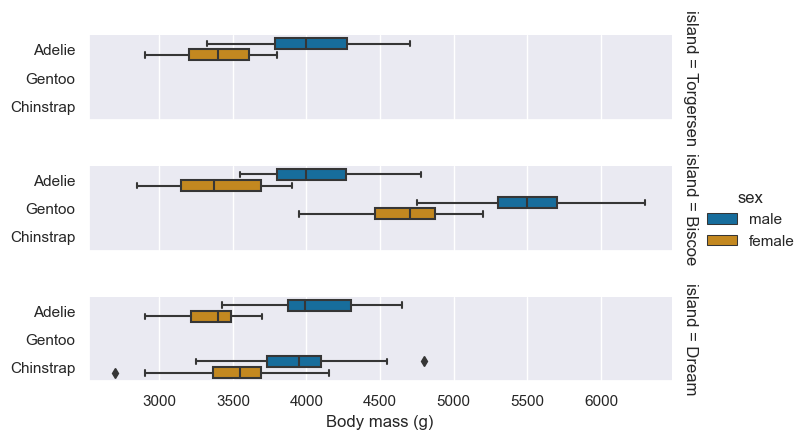

In [63]:
g = sns.catplot(
    data=df,
    x="body_mass_g", y="species", hue='sex', row="island",
    kind="box", orient="h",
    sharex=True, margin_titles=True,
    height=1.5, aspect=5
)
g.set(xlabel="Body mass (g)", ylabel="")

## Relazioni tra variabili

Calcoliamo la correlazione tra le variabili.

In [64]:
correlation_matrix=df.corr().round(2)
correlation_matrix

/var/folders/hl/dt523djx7_q7xjrthzjpdvc40000gn/T/ipykernel_10658/1490986381.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr().round(2)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.00,-0.24,0.66,0.60,0.05
bill_depth_mm,-0.24,1.00,-0.58,-0.47,-0.06
flipper_length_mm,0.66,-0.58,1.00,0.87,0.17
body_mass_g,0.60,-0.47,0.87,1.00,0.04
year,0.05,-0.06,0.17,0.04,1.00


È più semplice leggere queste informazioni usando la rappresentazione seguente.

<AxesSubplot: >

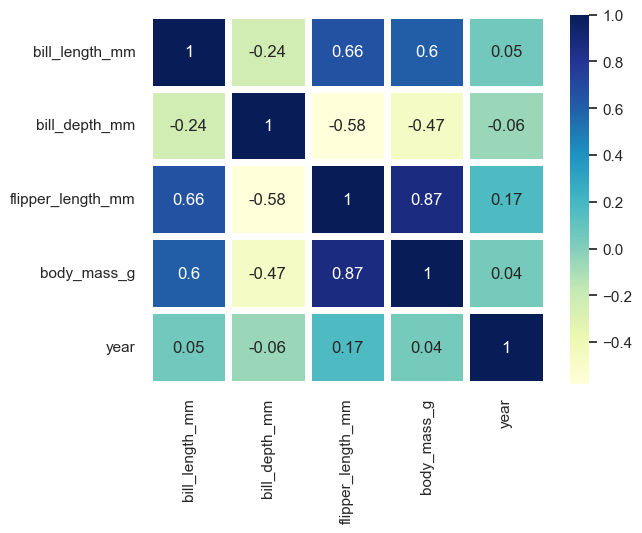

In [65]:
sns.heatmap(correlation_matrix,annot=True,linecolor='white',linewidths=5,cmap="YlGnBu")

La lunghezza della pinna e la massa corporea sono fortemente associati con una correlazione di 0.87. In altre parole, i pinguini con pinne più lunghe generalmente pesano di più.

Vediamo qui sotto un esempio di diagramma a dispersione.

<AxesSubplot: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

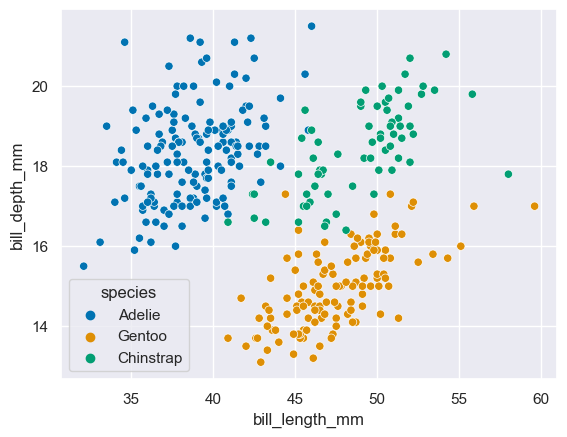

In [68]:
sns.scatterplot(df, x='bill_length_mm', y='bill_depth_mm', hue='species')

Chiaramente le osservazioni delle tre specie si raggruppano in cluster separati. Per ciascuna specie, la lunghezza e la largezza del becco rientrano in un certo intervallo.

È utile creare grafici separati in base a qualche dimensione dei dati; nell'esempio qui sotto, in base all'isola:

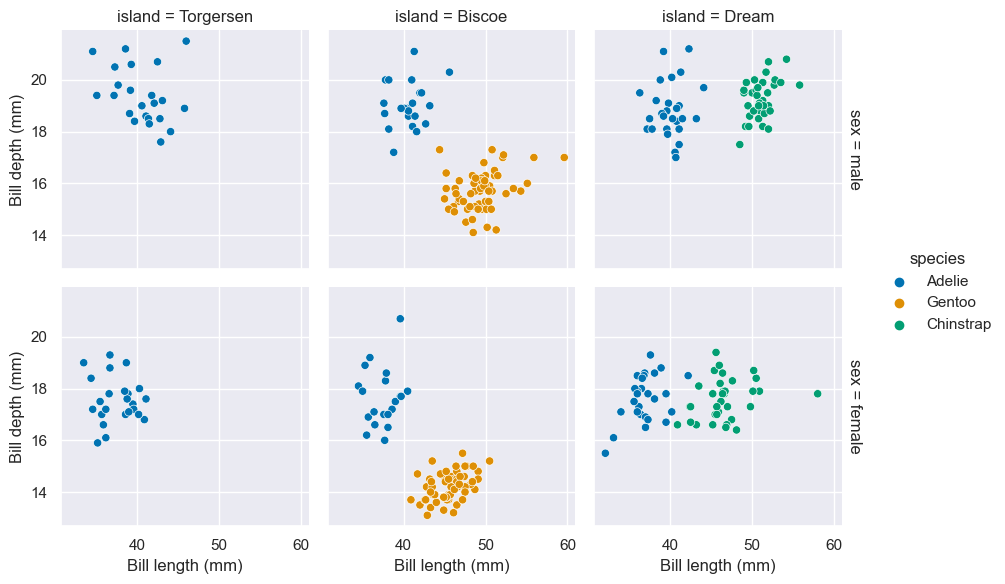

In [85]:
g = sns.relplot(
    data=df, 
    x="bill_length_mm", y="bill_depth_mm", hue="species",
    row="sex", col='island',
    height=3, facet_kws=dict(margin_titles=True),
)
g.set_axis_labels("Bill length (mm)", "Bill depth (mm)",)


## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w